In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from dtreeviz.trees import dtreeviz 
import seaborn as sns

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

In [3]:
df = pd.read_csv('alldata_clean_final.csv')
df_outcomes = pd.read_csv('alldata_clean_final_outcomes.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
list(df_outcomes.columns)

['participant_id',
 'age_2yr',
 'bmi_2yr',
 'char_rise_2yr',
 'helper column_2yr_L',
 'helper column_2yr_R',
 'hoos_adl_mdc_2yr_L',
 'hoos_adl_mdc_2yr_R',
 'hoos_adl_score_2yr_L',
 'hoos_adl_score_2yr_R',
 'hoos_pain_mdc_2yr_L',
 'hoos_pain_mdc_2yr_R',
 'hoos_pain_score_2yr_L',
 'hoos_pain_score_2yr_R',
 'hoos_qol_mdc_2yr_L',
 'hoos_qol_mdc_2yr_R',
 'hoos_qol_score_2yr_L',
 'hoos_qol_score_2yr_R',
 'hoos_sports_mdc_2yr_L',
 'hoos_sports_mdc_2yr_R',
 'hoos_sports_score_2yr_L',
 'hoos_sports_score_2yr_R',
 'hoos_symptoms_mdc_2yr_L',
 'hoos_symptoms_mdc_2yr_R',
 'hoos_symptoms_score_2yr_L',
 'hoos_symptoms_score_2yr_R',
 'ipaq_categorical_score_2yr_L',
 'ipaq_moderate_met_2yr_L',
 'ipaq_ss_mdhrs_c_2yr_L',
 'ipaq_ss_vdhrs_c_2yr_L',
 'ipaq_ss_wdhrs_c_2yr_L',
 'ipaq_vigorous_met_2yr_L',
 'ipaq_walking_met_2yr_L',
 'm_walk_test_2yr',
 'mhi5_score_2yr',
 'mri_date_2yr_L',
 'mri_date_2yr_R',
 'participant_id_side_2yr_L',
 'participant_id_side_2yr_R',
 'redcap_event_name_2yr_L',
 'redcap_event_n

array([[<AxesSubplot:title={'center':'hoos_adl_mdc_2yr_L'}>,
        <AxesSubplot:title={'center':'hoos_adl_mdc_2yr_R'}>]],
      dtype=object)

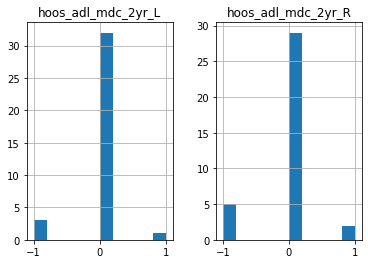

In [14]:
df_outcomes.hist(column=['hoos_adl_mdc_2yr_L','hoos_adl_mdc_2yr_R'])  #

array([[<AxesSubplot:title={'center':'hoos_symptoms_mdc_2yr_L'}>,
        <AxesSubplot:title={'center':'hoos_symptoms_mdc_2yr_R'}>],
       [<AxesSubplot:title={'center':'hoos_qol_mdc_2yr_L'}>,
        <AxesSubplot:title={'center':'hoos_qol_mdc_2yr_R'}>]],
      dtype=object)

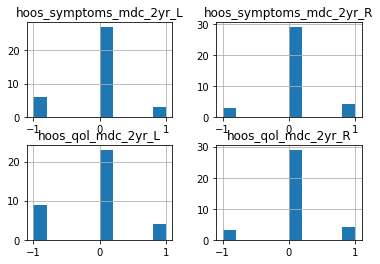

In [15]:
df_outcomes.hist(column=[ 'hoos_symptoms_mdc_2yr_L', 'hoos_symptoms_mdc_2yr_R', 'hoos_qol_mdc_2yr_L',
 'hoos_qol_mdc_2yr_R'])  #

array([[<AxesSubplot:title={'center':'hoos_pain_mdc_2yr_L'}>,
        <AxesSubplot:title={'center':'hoos_pain_mdc_2yr_R'}>],
       [<AxesSubplot:title={'center':'hoos_sports_mdc_2yr_L'}>,
        <AxesSubplot:title={'center':'hoos_sports_mdc_2yr_R'}>]],
      dtype=object)

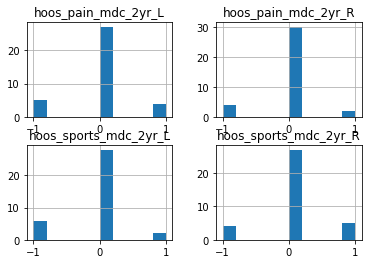

In [16]:
df_outcomes.hist(column=['hoos_pain_mdc_2yr_L','hoos_pain_mdc_2yr_R', 'hoos_sports_mdc_2yr_L','hoos_sports_mdc_2yr_R'])  #

In [5]:
df_xy = pd.merge(df, df_outcomes)

In [6]:
df_xy.describe()

,age_0bl,bmi_0bl,char_rise_0bl,gender,height,hoos_adl_score_0bl_L,hoos_adl_score_0bl_R,hoos_pain_score_0bl_L,hoos_pain_score_0bl_R,hoos_qol_score_0bl_L,hoos_qol_score_0bl_R,hoos_sports_score_0bl_L,hoos_sports_score_0bl_R,hoos_symptoms_score_0bl_L,hoos_symptoms_score_0bl_R,ipaq_moderate_met_0bl_L,ipaq_vigorous_met_0bl_L,ipaq_walking_met_0bl_L,kl_score_0bl_L,kl_score_0bl_R,m_walk_test_0bl,mhi5_score_0bl,shoamri_bme_score_0bl_L,shoamri_bme_score_0bl_R,shoamri_car_score_0bl_L,shoamri_car_score_0bl_R,shoamri_lab_score_0bl_L,shoamri_lab_score_0bl_R,shoamri_mis_score_0bl_L,shoamri_mis_score_0bl_R,shoamri_sc_score_0bl_L,shoamri_sc_score_0bl_R,shoamri_total_0bl_L,shoamri_total_0bl_R,side_plank_0bl_L,side_plank_0bl_R,st_hip_ext_norm_0bl_L,st_hip_ext_norm_0bl_R,st_hip_flex_norm_0bl_L,st_hip_flex_norm_0bl_R,stair_climbing_0bl,t1rho_mean_ace_2_0bl_L,t1rho_mean_ace_2_0bl_R,t1rho_mean_ace_3_0bl_L,t1rho_mean_ace_3_0bl_R,t1rho_mean_ace_4_0bl_L,t1rho_mean_ace_4_0bl_R,t1rho_mean_ace_5_0bl_L,t1rho_mean_ace_5_0bl_R,t1rho_mean_ace_6_0bl_L,t1rho_mean_ace_6_0bl_R,t1rho_mean_ace_whole_cartilage_0bl_L,t1rho_mean_ace_whole_cartilage_0bl_R,t1rho_mean_fem_2_0bl_L,t1rho_mean_fem_2_0bl_R,t1rho_mean_fem_3_0bl_L,t1rho_mean_fem_3_0bl_R,t1rho_mean_fem_4_0bl_L,t1rho_mean_fem_4_0bl_R,t1rho_mean_fem_5_0bl_L,t1rho_mean_fem_5_0bl_R,t1rho_mean_fem_6_0bl_L,t1rho_mean_fem_6_0bl_R,t1rho_mean_fem_7_0bl_L,t1rho_mean_fem_7_0bl_R,t1rho_mean_fem_whole_cartilage_0bl_L,t1rho_mean_fem_whole_cartilage_0bl_R,t2_mean_ace_2_0bl_L,t2_mean_ace_3_0bl_L,t2_mean_ace_3_0bl_R,t2_mean_ace_4_0bl_L,t2_mean_ace_4_0bl_R,t2_mean_ace_5_0bl_L,t2_mean_ace_5_0bl_R,t2_mean_ace_6_0bl_L,t2_mean_ace_6_0bl_R,t2_mean_ace_whole_cartilage_0bl_L,t2_mean_ace_whole_cartilage_0bl_R,t2_mean_fem_2_0bl_L,t2_mean_fem_3_0bl_L,t2_mean_fem_3_0bl_R,t2_mean_fem_4_0bl_L,t2_mean_fem_4_0bl_R,t2_mean_fem_5_0bl_L,t2_mean_fem_5_0bl_R,t2_mean_fem_6_0bl_L,t2_mean_fem_6_0bl_R,t2_mean_fem_7_0bl_L,t2_mean_fem_7_0bl_R,t2_mean_fem_whole_cartilage_0bl_L,t2_mean_fem_whole_cartilage_0bl_R,weight_kg_0bl,age_2yr,bmi_2yr,char_rise_2yr,helper column_2yr_L,helper column_2yr_R,hoos_adl_mdc_2yr_L,hoos_adl_mdc_2yr_R,hoos_adl_score_2yr_L,hoos_adl_score_2yr_R,hoos_pain_mdc_2yr_L,hoos_pain_mdc_2yr_R,hoos_pain_score_2yr_L,hoos_pain_score_2yr_R,hoos_qol_mdc_2yr_L,hoos_qol_mdc_2yr_R,hoos_qol_score_2yr_L,hoos_qol_score_2yr_R,hoos_sports_mdc_2yr_L,hoos_sports_mdc_2yr_R,hoos_sports_score_2yr_L,hoos_sports_score_2yr_R,hoos_symptoms_mdc_2yr_L,hoos_symptoms_mdc_2yr_R,hoos_symptoms_score_2yr_L,hoos_symptoms_score_2yr_R,ipaq_categorical_score_2yr_L,ipaq_moderate_met_2yr_L,ipaq_ss_mdhrs_c_2yr_L,ipaq_ss_vdhrs_c_2yr_L,ipaq_ss_wdhrs_c_2yr_L,ipaq_vigorous_met_2yr_L,ipaq_walking_met_2yr_L,m_walk_test_2yr,mhi5_score_2yr,shoamri_bme_score_2yr_L,shoamri_bme_score_2yr_R,shoamri_car_score_2yr_L,shoamri_car_score_2yr_R,shoamri_lab_score_2yr_L,shoamri_lab_score_2yr_R,shoamri_mis_score_2yr_L,shoamri_mis_score_2yr_R,shoamri_sc_score_2yr_L,shoamri_sc_score_2yr_R,shoamri_total_2yr_L,shoamri_total_2yr_R,side_plank_2yr_L,side_plank_2yr_R,st_hip_abd_norm_2yr_L,st_hip_abd_norm_2yr_R,st_hip_add_norm_2yr_L,st_hip_add_norm_2yr_R,st_hip_ext_norm_2yr_L,st_hip_ext_norm_2yr_R,st_hip_flex_norm_2yr_L,st_hip_flex_norm_2yr_R,st_hip_side_2yr_L,st_hip_side_2yr_R,stair_climbing_2yr,t1rho_mean_ace_2_2yr_L,t1rho_mean_ace_2_2yr_R,t1rho_mean_ace_3_2yr_L,t1rho_mean_ace_3_2yr_R,t1rho_mean_ace_4_2yr_L,t1rho_mean_ace_4_2yr_R,t1rho_mean_ace_5_2yr_L,t1rho_mean_ace_5_2yr_R,t1rho_mean_ace_6_2yr_L,t1rho_mean_ace_6_2yr_R,t1rho_mean_ace_whole_cartilage_2yr_L,t1rho_mean_ace_whole_cartilage_2yr_R,t1rho_mean_fem_2_2yr_L,t1rho_mean_fem_2_2yr_R,t1rho_mean_fem_3_2yr_L,t1rho_mean_fem_3_2yr_R,t1rho_mean_fem_4_2yr_L,t1rho_mean_fem_4_2yr_R,t1rho_mean_fem_5_2yr_L,t1rho_mean_fem_5_2yr_R,t1rho_mean_fem_6_2yr_L,t1rho_mean_fem_6_2yr_R,t1rho_mean_fem_7_2yr_L,t1rho_mean_fem_7_2yr_R,t1rho_mean_fem_whole_cartilage_2yr_L,t1rho_mean_fem_whole_cartilage_2yr_R,t2_mean_ace_2_2yr_L,t2_mean_ace_2_2yr_R,t2_mean_ace_3_2yr_L,t2_mean_

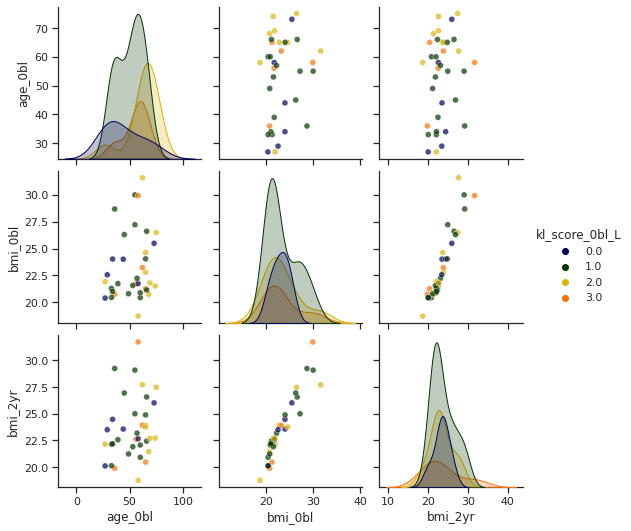

In [7]:
###### DESCRIPTIVE STATS#######
#DEMOGRAPHICS<> KL Score
# Use seaborn for pair plots
sns.set(style="ticks", color_codes=True);

# Will only use six variables for plotting pairs
reduced_features = df_xy[['age_0bl', 'bmi_0bl', 'bmi_2yr', 'kl_score_0bl_L' ]]

palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'kl_score_0bl_L', palette = palette, diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

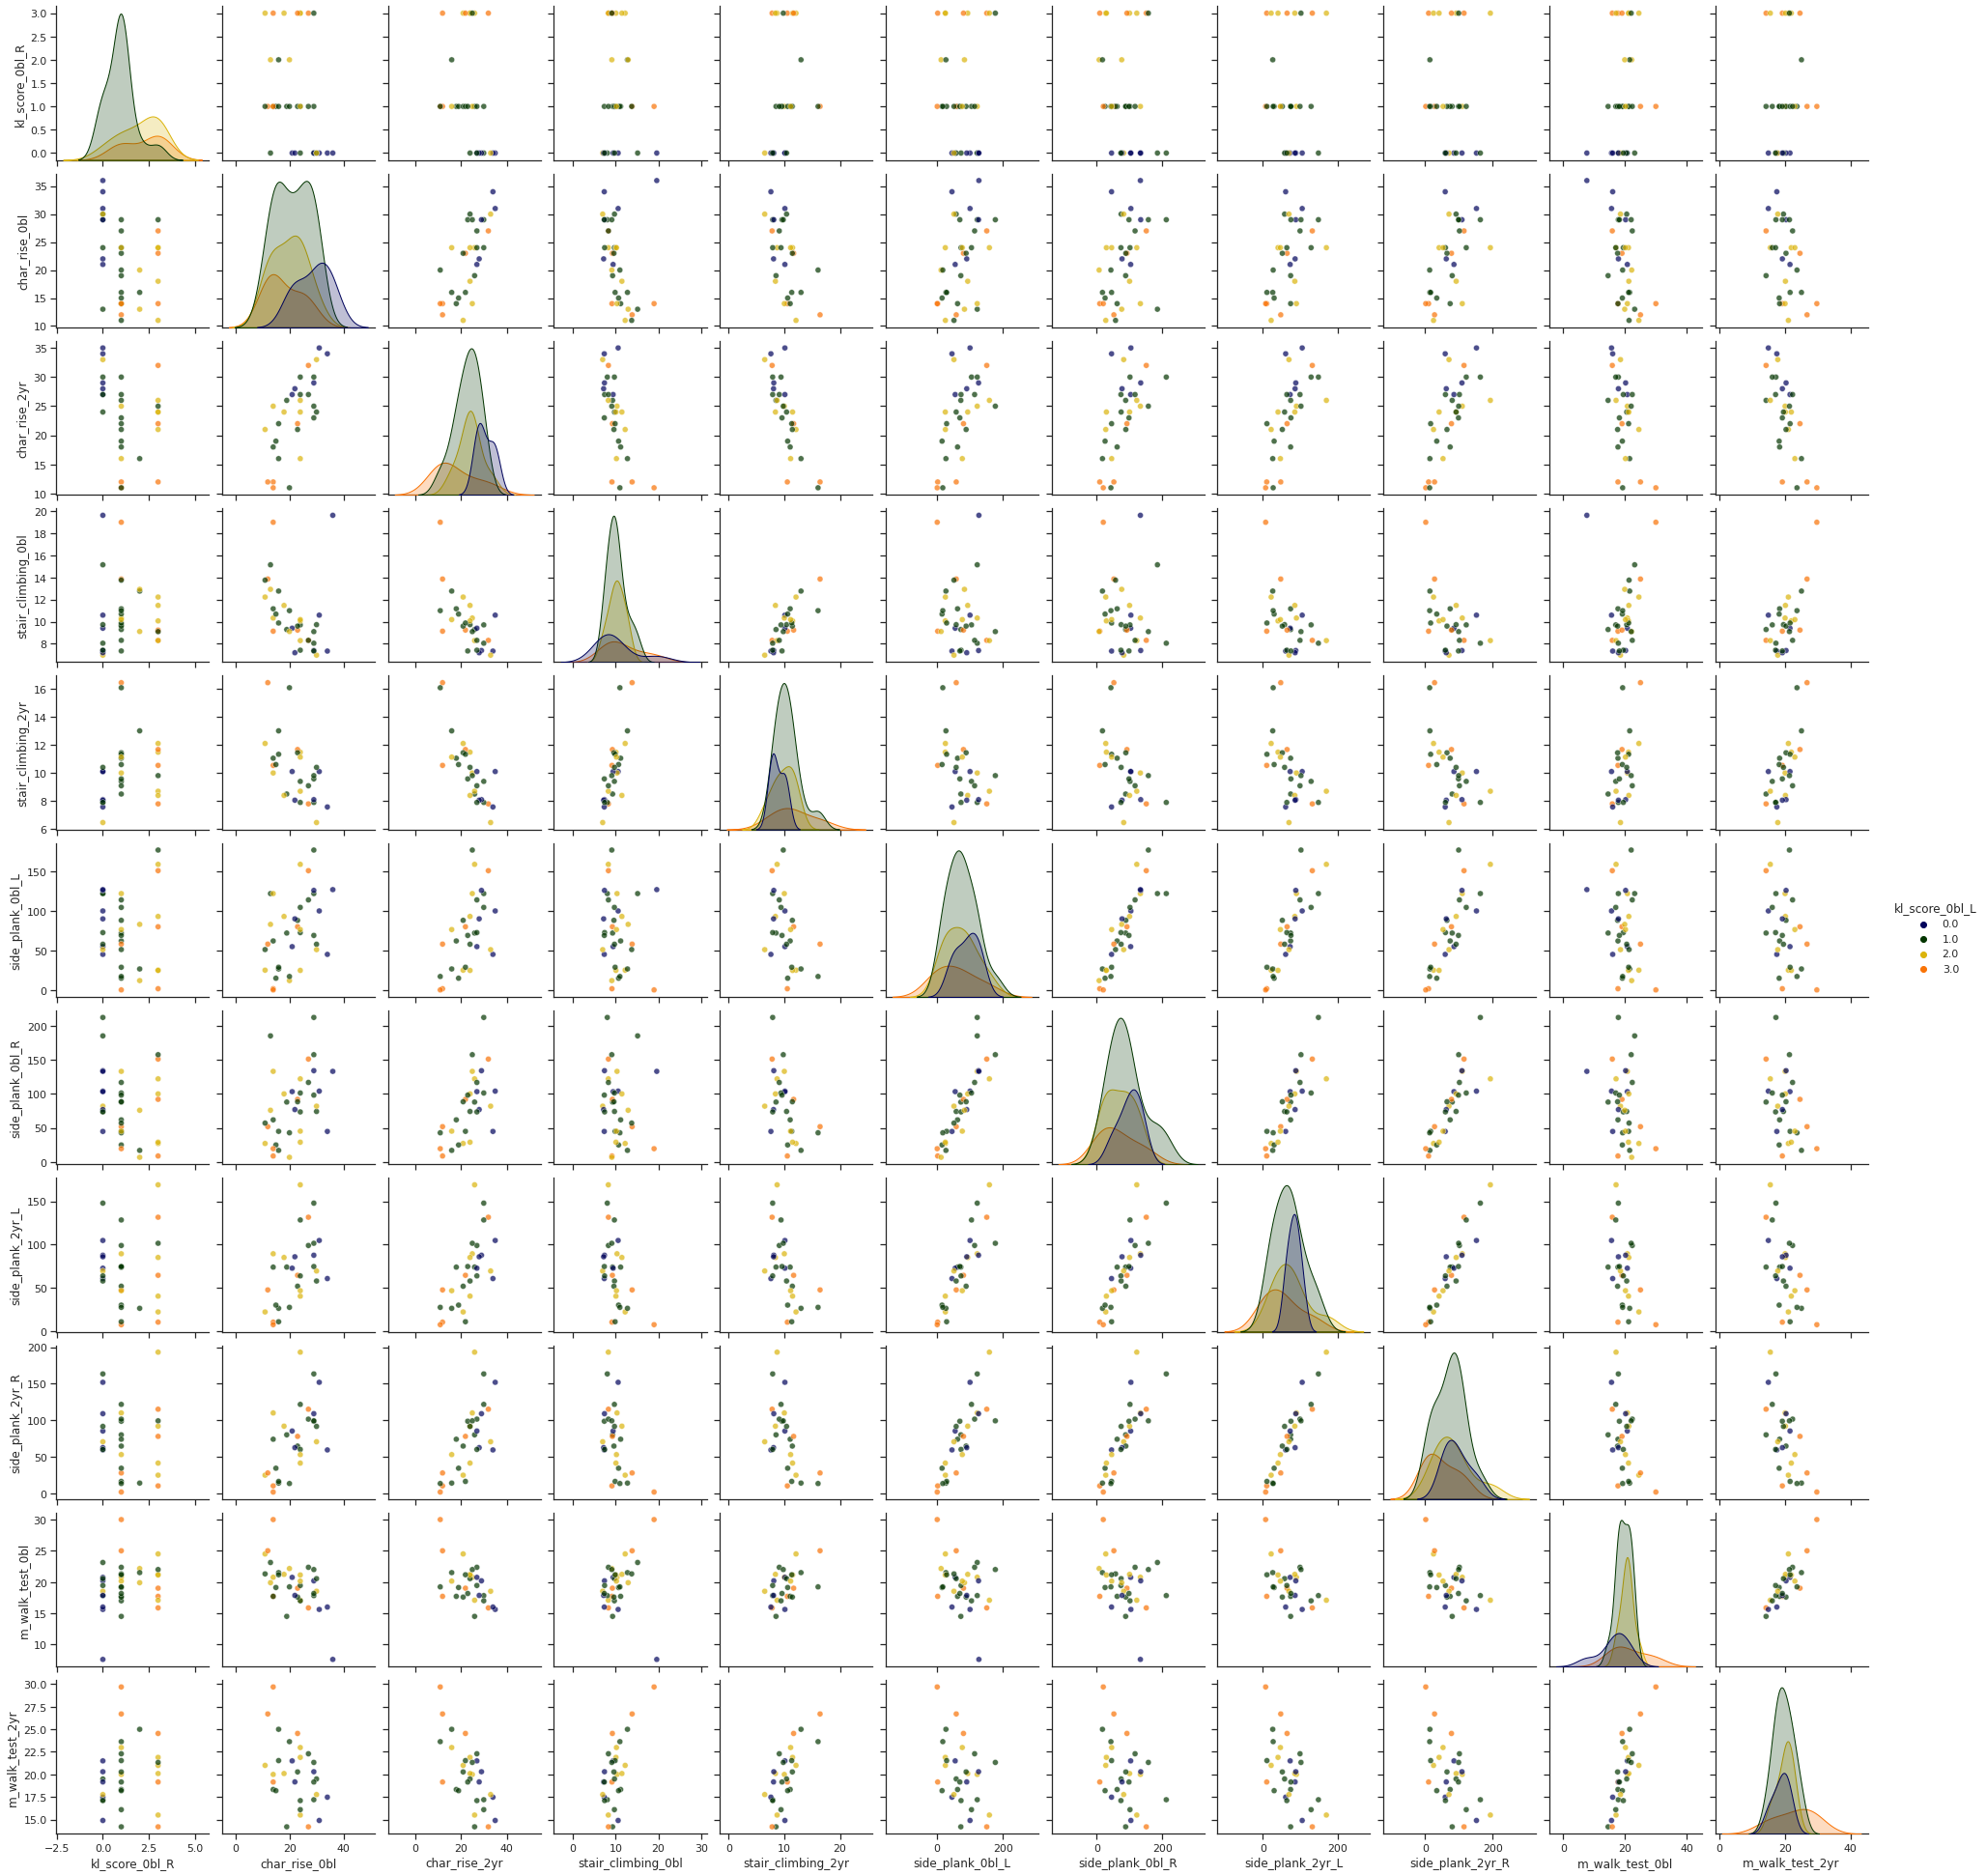

In [8]:
#functional tests <> KL
# Use seaborn for pair plots
sns.set(style="ticks", color_codes=True);

# Will only use six variables for plotting pairs
reduced_features = df_xy[['kl_score_0bl_L',
 'kl_score_0bl_R',  'char_rise_0bl', 'char_rise_2yr',
                      'stair_climbing_0bl','stair_climbing_2yr',
                     'side_plank_0bl_L',   'side_plank_0bl_R', 'side_plank_2yr_L',
 'side_plank_2yr_R','m_walk_test_0bl', 'm_walk_test_2yr']]
                       

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'kl_score_0bl_L', palette = palette, diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

In [10]:
######## DATA PREPARATION ########
#HOOS
y = df_outcomes[['hoos_pain_mdc_2yr_L',
'hoos_pain_mdc_2yr_L',
'hoos_adl_mdc_2yr_L',
'hoos_adl_mdc_2yr_L',
'hoos_symptoms_mdc_2yr_L',
 'hoos_symptoms_mdc_2yr_L',
 'hoos_qol_mdc_2yr_L',
 'hoos_qol_mdc_2yr_L',
 'hoos_sports_mdc_2yr_L',
'hoos_sports_mdc_2yr_L']]

In [11]:
y

,hoos_pain_mdc_2yr_L,hoos_pain_mdc_2yr_L,hoos_adl_mdc_2yr_L,hoos_adl_mdc_2yr_L,hoos_symptoms_mdc_2yr_L,hoos_symptoms_mdc_2yr_L,hoos_qol_mdc_2yr_L,hoos_qol_mdc_2yr_L,hoos_sports_mdc_2yr_L,hoos_sports_mdc_2yr_L
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,-1,-1
2,0,0,0,0,0,0,-1,-1,0,0
3,-1,-1,-1,-1,-1,-1,0,0,-1,-1
4,1,1,0,0,-1,-1,1,1,0,0
5,1,1,1,1,1,1,1,1,1,1
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,1,0,0
8,0,0,0,0,0,0,0,0,0,0
9,-1,-1,0,0,0,0,-1,-1,0,0


In [31]:
#ALL BASELINE DATA
df.drop(['participant_id'], axis=1, inplace=True)

In [32]:
list(df.columns)

['age_0bl',
 'bmi_0bl',
 'char_rise_0bl',
 'gender',
 'height',
 'hoos_adl_score_0bl_L',
 'hoos_adl_score_0bl_R',
 'hoos_pain_score_0bl_L',
 'hoos_pain_score_0bl_R',
 'hoos_qol_score_0bl_L',
 'hoos_qol_score_0bl_R',
 'hoos_sports_score_0bl_L',
 'hoos_sports_score_0bl_R',
 'hoos_symptoms_score_0bl_L',
 'hoos_symptoms_score_0bl_R',
 'ipaq_moderate_met_0bl_L',
 'ipaq_vigorous_met_0bl_L',
 'ipaq_walking_met_0bl_L',
 'kl_score_0bl_L',
 'kl_score_0bl_R',
 'm_walk_test_0bl',
 'mhi5_score_0bl',
 'shoamri_bme_score_0bl_L',
 'shoamri_bme_score_0bl_R',
 'shoamri_car_score_0bl_L',
 'shoamri_car_score_0bl_R',
 'shoamri_lab_score_0bl_L',
 'shoamri_lab_score_0bl_R',
 'shoamri_mis_score_0bl_L',
 'shoamri_mis_score_0bl_R',
 'shoamri_sc_score_0bl_L',
 'shoamri_sc_score_0bl_R',
 'shoamri_total_0bl_L',
 'shoamri_total_0bl_R',
 'side_plank_0bl_L',
 'side_plank_0bl_R',
 'st_hip_ext_norm_0bl_L',
 'st_hip_ext_norm_0bl_R',
 'st_hip_flex_norm_0bl_L',
 'st_hip_flex_norm_0bl_R',
 'stair_climbing_0bl',
 't1rho_mea

In [33]:
######## MODEL SETUP ###########
# Split up training and testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df, y, 
                                                                            test_size = 0.4, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (21, 92)
Training Labels Shape: (21, 10)
Testing Features Shape: (15, 92)
Testing Labels Shape: (15, 10)


In [35]:
#Create a random grid to search for best hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [36]:
rf = ExtraTreesRegressor() 
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)


rf_random.fit(train_features, train_labels);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [37]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': False}

In [38]:
#evaluate accuracy of base model using .score 
base_model = ExtraTreesRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_model.score(test_features, test_labels) #r squared

0.10110028087512182

In [39]:
# Make predictions on test data using the model trained on original data
predictions = base_model.predict(test_features)
errors = abs(predictions - test_labels)
# Performance metrics

print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'points.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: hoos_adl_score_2yr_L          5.40
hoos_adl_score_2yr_R          3.68
hoos_pain_score_2yr_L         8.38
hoos_pain_score_2yr_R         5.43
hoos_qol_score_2yr_L         13.58
hoos_qol_score_2yr_R          8.67
hoos_sports_score_2yr_L       9.46
hoos_sports_score_2yr_R       6.96
hoos_symptoms_score_2yr_L     8.50
hoos_symptoms_score_2yr_R     7.73
dtype: float64 points.
Accuracy: hoos_adl_score_2yr_L         94.23
hoos_adl_score_2yr_R         96.06
hoos_pain_score_2yr_L        89.87
hoos_pain_score_2yr_R        92.90
hoos_qol_score_2yr_L         81.75
hoos_qol_score_2yr_R         87.64
hoos_sports_score_2yr_L      89.17
hoos_sports_score_2yr_R      91.07
hoos_symptoms_score_2yr_L    88.95
hoos_symptoms_score_2yr_R    90.26
dtype: float64 %.


In [40]:
#evaluate accuracy of model using evaluate function
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average absolute error:', round(np.mean(errors), 2), 'points.')
    print('Accuracy:', round(accuracy, 2), '%.')
    
    return accuracy

In [41]:
base_accuracy = evaluate(base_model, test_features, test_labels)

Model Performance
Average absolute error: hoos_adl_score_2yr_L          5.40
hoos_adl_score_2yr_R          3.68
hoos_pain_score_2yr_L         8.38
hoos_pain_score_2yr_R         5.43
hoos_qol_score_2yr_L         13.58
hoos_qol_score_2yr_R          8.67
hoos_sports_score_2yr_L       9.46
hoos_sports_score_2yr_R       6.96
hoos_symptoms_score_2yr_L     8.50
hoos_symptoms_score_2yr_R     7.73
dtype: float64 points.
Accuracy: hoos_adl_score_2yr_L         94.23
hoos_adl_score_2yr_R         96.06
hoos_pain_score_2yr_L        89.87
hoos_pain_score_2yr_R        92.90
hoos_qol_score_2yr_L         81.75
hoos_qol_score_2yr_R         87.64
hoos_sports_score_2yr_L      89.17
hoos_sports_score_2yr_R      91.07
hoos_symptoms_score_2yr_L    88.95
hoos_symptoms_score_2yr_R    90.26
dtype: float64 %.


In [42]:
#evaluation accuracy of best model from random grid search
best_random = rf_random.best_estimator_
best_random.score(test_features, test_labels) #r squared

0.22871569330517677

In [43]:
#evaluate accuracy of model using accuracy_score 
random_accuracy = evaluate(best_random, test_features, test_labels)

Model Performance
Average absolute error: hoos_adl_score_2yr_L          3.62
hoos_adl_score_2yr_R          5.05
hoos_pain_score_2yr_L         7.03
hoos_pain_score_2yr_R         6.66
hoos_qol_score_2yr_L         10.92
hoos_qol_score_2yr_R          8.56
hoos_sports_score_2yr_L       8.13
hoos_sports_score_2yr_R       8.78
hoos_symptoms_score_2yr_L     7.74
hoos_symptoms_score_2yr_R     8.59
dtype: float64 points.
Accuracy: hoos_adl_score_2yr_L         96.16
hoos_adl_score_2yr_R         94.40
hoos_pain_score_2yr_L        91.48
hoos_pain_score_2yr_R        91.32
hoos_qol_score_2yr_L         85.65
hoos_qol_score_2yr_R         87.47
hoos_sports_score_2yr_L      90.96
hoos_sports_score_2yr_R      88.45
hoos_symptoms_score_2yr_L    89.62
hoos_symptoms_score_2yr_R    89.07
dtype: float64 %.


Text(0, 0.5, 'predictions')

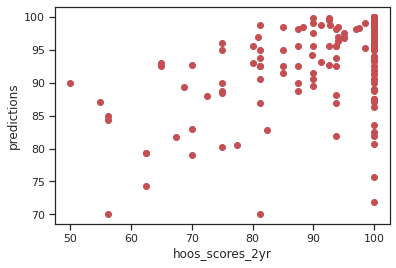

In [85]:
#code to confirm accuracy scores
predictions = base_model.predict(test_features)
plt.plot(test_labels, predictions, 'ro')
plt.xlabel('hoos_scores_2yr')
plt.ylabel('predictions')

In [62]:
#examine feature importances from best model from random grid search
feature_df = pd.DataFrame({'feature': df.columns,
                          'importance': best_random.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

ValueError: All arrays must be of the same length

In [ ]:
#https://scikit-learn.org/stable/modules/multiclass.html#multioutput-regression
#best_random.estimators_[0]
#viz = dtreeviz(best_random.estimators_[0], train_labels, train_features)

In [49]:
########## SEQUENTIAL FEATURE SELECTION ##############
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Build step forward feature selection
sfs1 = sfs(rf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='neg_mean_absolute_error',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(train_features, train_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:   34.8s finished

[2022-04-01 12:21:51] Features: 1/5 -- score: -7.208916055555562[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:   34.5s finished

[2022-04-01 12:22:26] Features: 2/5 -- score: -6.1681330238095216[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   5.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   1.5s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.8s
[CV] END bootstrap=True, max_depth=Non

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   35.8s finished

[2022-04-01 12:23:01] Features: 3/5 -- score: -5.521797499999997[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:   34.4s finished

[2022-04-01 12:23:36] Features: 4/5 -- score: -5.514413499999998[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:   34.2s finished

[2022-04-01 12:24:10] Features: 5/5 -- score: -5.5000164

In [50]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
newfeatures=train_features.iloc[:, feat_cols]
list(newfeatures.columns)

['char_rise_0bl',
 'hoos_pain_score_0bl_L',
 'hoos_sports_score_0bl_R',
 'shoamri_sc_score_0bl_L',
 't2_mean_ace_4_0bl_R']

In [51]:
# Build full model with selected features
best_random.fit(newfeatures, train_labels)

#random_accuracy = evaluate(best_random, newfeatures, train_labels)

random_accuracy = evaluate(best_random, test_features.iloc[:, feat_cols], test_labels)

Model Performance
Average absolute error: hoos_adl_score_2yr_L          4.59
hoos_adl_score_2yr_R          4.41
hoos_pain_score_2yr_L         6.73
hoos_pain_score_2yr_R         6.47
hoos_qol_score_2yr_L         11.22
hoos_qol_score_2yr_R          8.30
hoos_sports_score_2yr_L       9.94
hoos_sports_score_2yr_R       9.05
hoos_symptoms_score_2yr_L     5.97
hoos_symptoms_score_2yr_R     9.22
dtype: float64 points.
Accuracy: hoos_adl_score_2yr_L         95.14
hoos_adl_score_2yr_R         95.09
hoos_pain_score_2yr_L        91.95
hoos_pain_score_2yr_R        91.46
hoos_qol_score_2yr_L         85.67
hoos_qol_score_2yr_R         87.55
hoos_sports_score_2yr_L      88.95
hoos_sports_score_2yr_R      88.25
hoos_symptoms_score_2yr_L    91.61
hoos_symptoms_score_2yr_R    88.17
dtype: float64 %.


In [52]:
#examine feature importance
feature_df = pd.DataFrame({'feature': newfeatures.columns,
                          'importance': best_random.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

,feature,importance
2,hoos_sports_score_0bl_R,0.487775
1,hoos_pain_score_0bl_L,0.322546
0,char_rise_0bl,0.089368
4,t2_mean_ace_4_0bl_R,0.057071
3,shoamri_sc_score_0bl_L,0.043239
